# The Project :: Time Series Analysis

* Import requried Liberaries and Frame works ::

In [1]:
import numpy     as np
import pandas    as pd
import seaborn   as sns
import datasist  as ds
import missingno as mno
import warnings  as w
import matplotlib.pyplot as plt
import pandas_profiling  as pp

* Set some instructions ::

In [2]:
%matplotlib inline
w.filterwarnings("ignore")
sns.set(rc = {"figure.figsize" : [20 , 10]} , font_scale = 1.7)

In [3]:
# loading data ::
df = pd.read_csv("multiTimeline.csv")
df

,,,Category: All categories
Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
2004-01,100,31,48
2004-02,75,26,49
2004-03,67,24,47
2004-04,70,22,48
...,...,...,...
2017-08,46,52,43
2017-09,44,50,47
2017-10,44,47,45
2017-11,41,47,47


In [4]:
# Handling dataframe  ::
df = pd.read_csv("multiTimeline.csv" , skiprows=1)
# rename columns of dataframe ::
df.columns = ["Date" , "Diet" , "GYM" , "Finance"]
df

,Date,Diet,GYM,Finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43
...,...,...,...,...
163,2017-08,46,52,43
164,2017-09,44,50,47
165,2017-10,44,47,45
166,2017-11,41,47,47


* From The result above we can see that ::
    * We have 168 record of data.
    * We have 4 Features.
    * Our-Target :: Oil Price
* Features of Data ::
    * Date  :: Its Present Date of all one of oil Price.
    * Diet :: Num of people who do diet.
    * GYM  :: Num of People who do GYM.
    * Finance :: Degree of finance.

<p id="Wrangling">Exploratory data analysis</p>

* *EDA Task* ::
    *  It one of the most important phase of data scientist life cycle which we apply some statistical oprations toidentify the Behaviour of data  to extract meaningful knowledge , insights and vesion from that data to help steckholders to make more efficient decision which improve and enhance our Buesines.

* Statistical analysis Process ::

In [5]:
df.columns

Index(['Date', 'Diet', 'GYM', 'Finance'], dtype='object')

In [6]:
df.dtypes

Date       object
Diet        int64
GYM         int64
Finance     int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     168 non-null    object
 1   Diet     168 non-null    int64 
 2   GYM      168 non-null    int64 
 3   Finance  168 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.4+ KB


* From the result above we can see that ::
    * The dtype of Date is object insted of datetime dtype.
    *  Data not include Missing data values.

In [8]:
# Casting the dtype of Date from object into Datetime dtype
df["Date"] = pd.to_datetime(df["Date"])
df[["Date"]]

,Date
0,2004-01-01
1,2004-02-01
2,2004-03-01
3,2004-04-01
4,2004-05-01
...,...
163,2017-08-01
164,2017-09-01
165,2017-10-01
166,2017-11-01


In [9]:
# present statistical describtion of numerical data
df.describe()

,Diet,GYM,Finance
count,168.000000,168.000000,168.000000
mean,49.642857,34.690476,47.148810
std,8.033080,8.134316,4.972547
min,34.000000,22.000000,38.000000
25%,44.000000,28.000000,44.000000
50%,48.500000,32.500000,46.000000
75%,53.000000,41.000000,50.000000
max,100.000000,58.000000,73.000000


In [10]:
# Apply Feature enginerring techniqe to generate new features
df["Years"]  = df["Date"].dt.year  
df["Moth"]   = df["Date"].dt.month
df["Day"]    = df["Date"].dt.day


In [11]:
df

,Date,Diet,GYM,Finance,Years,Moth,Day
0,2004-01-01,100,31,48,2004,1,1
1,2004-02-01,75,26,49,2004,2,1
2,2004-03-01,67,24,47,2004,3,1
3,2004-04-01,70,22,48,2004,4,1
4,2004-05-01,72,22,43,2004,5,1
...,...,...,...,...,...,...,...
163,2017-08-01,46,52,43,2017,8,1
164,2017-09-01,44,50,47,2017,9,1
165,2017-10-01,44,47,45,2017,10,1
166,2017-11-01,41,47,47,2017,11,1


In [12]:
# identify the unique data values and its values count ::
for col in df.columns :
    print(f"The Col :: ({col})\n\nThe Col _ ({col}) _Unique_values :: {df[col].unique()}\n\n\
The Col _ ({col})_Value_counts :: \n\n{df[col].value_counts()}\n\n-----------\n-----------\n")

The Col :: (Date)

The Col _ (Date) _Unique_values :: ['2004-01-01T00:00:00.000000000' '2004-02-01T00:00:00.000000000'
 '2004-03-01T00:00:00.000000000' '2004-04-01T00:00:00.000000000'
 '2004-05-01T00:00:00.000000000' '2004-06-01T00:00:00.000000000'
 '2004-07-01T00:00:00.000000000' '2004-08-01T00:00:00.000000000'
 '2004-09-01T00:00:00.000000000' '2004-10-01T00:00:00.000000000'
 '2004-11-01T00:00:00.000000000' '2004-12-01T00:00:00.000000000'
 '2005-01-01T00:00:00.000000000' '2005-02-01T00:00:00.000000000'
 '2005-03-01T00:00:00.000000000' '2005-04-01T00:00:00.000000000'
 '2005-05-01T00:00:00.000000000' '2005-06-01T00:00:00.000000000'
 '2005-07-01T00:00:00.000000000' '2005-08-01T00:00:00.000000000'
 '2005-09-01T00:00:00.000000000' '2005-10-01T00:00:00.000000000'
 '2005-11-01T00:00:00.000000000' '2005-12-01T00:00:00.000000000'
 '2006-01-01T00:00:00.000000000' '2006-02-01T00:00:00.000000000'
 '2006-03-01T00:00:00.000000000' '2006-04-01T00:00:00.000000000'
 '2006-05-01T00:00:00.000000000' '20

In [13]:
df.columns

Index(['Date', 'Diet', 'GYM', 'Finance', 'Years', 'Moth', 'Day'], dtype='object')

In [14]:
# Get Record of maximum Diet number
df[df["Diet"] == df["Diet"].max()]

,Date,Diet,GYM,Finance,Years,Moth,Day
0,2004-01-01,100,31,48,2004,1,1


In [15]:
# Get Record of minimum Diet number
df[df["Diet"] == df["Diet"].min()]

,Date,Diet,GYM,Finance,Years,Moth,Day
47,2007-12-01,34,26,43,2007,12,1


In [16]:
# Get Record of maximum GYM number
df[df["GYM"] == df["GYM"].max()]

,Date,Diet,GYM,Finance,Years,Moth,Day
150,2016-07-01,43,58,41,2016,7,1


In [17]:
# Get Record of minimum GYM number
df[df["GYM"] == df["GYM"].min()]

,Date,Diet,GYM,Finance,Years,Moth,Day
3,2004-04-01,70,22,48,2004,4,1
4,2004-05-01,72,22,43,2004,5,1


In [18]:
# Get Record of maximum Finance number
df[df["Finance"] == df["Finance"].max()]

,Date,Diet,GYM,Finance,Years,Moth,Day
57,2008-10-01,43,28,73,2008,10,1


In [19]:
# Get Record of minimum Finance number
df[df["Finance"] == df["Finance"].min()]

,Date,Diet,GYM,Finance,Years,Moth,Day
23,2005-12-01,40,24,38,2005,12,1
107,2012-12-01,42,32,38,2012,12,1


In [20]:
df.groupby("Years").describe().transpose()

Years                2004       2005       2006       2007       2008  \
Diet    count   12.000000  12.000000  12.000000  12.000000  12.000000   
        mean    63.666667  51.916667  48.916667  46.666667  44.083333   
        std     15.107694   6.748176   6.721179   5.928871   3.752777   
        min     42.000000  40.000000  37.000000  34.000000  38.000000   
        25%     52.750000  46.750000  44.500000  43.750000  42.750000   
        50%     62.000000  53.000000  50.500000  48.000000  43.500000   
        75%     70.500000  56.000000  51.000000  49.500000  46.250000   
        max    100.000000  64.000000  64.000000  57.000000  52.000000   
GYM     count   12.000000  12.000000  12.000000  12.000000  12.000000   
        mean    24.666667  26.500000  27.916667  30.750000  29.250000   
        std      2.605356   2.315953   2.503028   2.598076   2.562846   
        min     22.000000  24.000000  25.000000  26.000000  27.000000   
        25%     23.000000  25.000000  26.000000  29.500000  27.750000   
        50%     24.000000  26.000000  27.000000  31.500000  28.000000   
        75%     25.250000  28.000000  29.250000  32.000000  30.250000   
        max     31.000000  32.000000  34.000000  35.000000  35.000000   
Finance count   12.000000  12.000000  12.000000  12.000000  12.000000   
        mean    45.083333  43.583333  44.416667  48.583333  53.916667   
        std      2.429303   2.391589   1.676486   3.117643   7.166314   
        min     41.000000  38.000000  41.000000  43.000000  48.000000   
        25%     43.750000  42.750000  44.000000  46.750000  49.750000   
        50%     44.500000  44.000000  44.500000  48.000000  52.000000   
        75%     47.250000  44.000000  45.250000  50.500000  54.250000   
        max     49.000000  48.000000  47.000000  54.000000  73.000000   
Moth    count   12.000000  12.000000  12.000000  12.000000  12.000000   
        mean     6.500000   6.500000   6.500000   6.500000   6.500000   
        std      3.605551   3.605551   3.605551   3.605551   3.605551   
        min      1.000000   1.000000   1.000000   1.000000   1.000000   
        25%      3.750000   3.750000   3.750000   3.750000   3.750000   
        50%      6.500000   6.500000   6.500000   6.500000   6.500000   
        75%      9.250000   9.250000   9.250000   9.250000   9.250000   
        max     12.000000  12.000000  12.000000  12.000000  12.000000   
Day     count   12.000000  12.000000  12.000000  12.000000  12.000000   
        mean     1.000000   1.000000   1.000000   1.000000   1.000000   
        std      0.000000   0.000000   0.000000   0.000000   0.000000   
        min      1.000000   1.000000   1.000000   1.000000   1.000000   
        25%      1.000000   1.000000   1.000000   1.000000   1.000000   
        50%      1.000000   1.000000   1.000000   1.000000   1.000000   
        75%      1.000000   1.000000   1.000000   1.000000   1.000000   
        max      1.000000   1.000000   1.000000   1.000000   1.000000   

Years               2009       2010       2011       2012       2013  \
Diet    count  12.000000  12.000000  12.000000  12.000000  12.000000   
        mean   46.083333  48.000000  52.583333  52.833333  53.500000   
        std     3.579191   4.472136   4.756973   6.249848   6.487751   
        min    39.000000  39.000000  44.000000  42.000000  42.000000   
        25%    44.000000  46.500000  49.750000  49.750000  49.750000   
        50%    47.000000  48.000000  52.000000  55.000000  55.000000   
        75%    48.000000  50.250000  54.750000  56.250000  58.000000   
        max    52.000000  57.000000  61.000000  64.000000  65.000000   
GYM     count  12.000000  12.000000  12.000000  12.000000  12.000000   
        mean   29.083333  29.916667  33.166667  35.500000  37.916667   
        std     2.234373   2.108784   2.443296   3.030152   2.108784   
        min    27.000000  28.000000  30.000000  32.000000  36.000000   
        25%    28.000000  28.000000  31.750000  33.000000  37.000000  

In [21]:
df.groupby("Moth").describe().transpose()

Moth                    1            2            3            4   \
Diet    count    14.000000    14.000000    14.000000    14.000000   
        mean     61.214286    53.214286    53.071429    53.285714   
        std      12.223424     7.329378     5.427342     6.157279   
        min      51.000000    46.000000    46.000000    47.000000   
        25%      54.250000    48.250000    50.250000    49.000000   
        50%      59.000000    52.000000    51.000000    51.000000   
        75%      64.000000    55.500000    55.500000    56.000000   
        max     100.000000    75.000000    67.000000    70.000000   
GYM     count    14.000000    14.000000    14.000000    14.000000   
        mean     40.285714    35.642857    34.785714    33.428571   
        std       7.878194     7.652120     8.266509     7.713268   
        min      31.000000    26.000000    24.000000    22.000000   
        25%      35.000000    30.000000    28.250000    28.250000   
        50%      37.000000    33.500000    32.500000    31.500000   
        75%      46.000000    41.500000    41.500000    39.250000   
        max      56.000000    51.000000    51.000000    48.000000   
Finance count    14.000000    14.000000    14.000000    14.000000   
        mean     47.142857    48.285714    48.285714    47.857143   
        std       3.655494     3.688414     4.008233     4.452435   
        min      43.000000    44.000000    44.000000    42.000000   
        25%      44.000000    46.250000    46.000000    45.250000   
        50%      46.000000    47.000000    47.000000    47.000000   
        75%      50.250000    49.750000    50.250000    48.750000   
        max      54.000000    58.000000    58.000000    57.000000   
Years   count    14.000000    14.000000    14.000000    14.000000   
        mean   2010.500000  2010.500000  2010.500000  2010.500000   
        std       4.183300     4.183300     4.183300     4.183300   
        min    2004.000000  2004.000000  2004.000000  2004.000000   
        25%    2007.250000  2007.250000  2007.250000  2007.250000   
        50%    2010.500000  2010.500000  2010.500000  2010.500000   
        75%    2013.750000  2013.750000  2013.750000  2013.750000   
        max    2017.000000  2017.000000  2017.000000  2017.000000   
Day     count    14.000000    14.000000    14.000000    14.000000   
        mean      1.000000     1.000000     1.000000     1.000000   
        std       0.000000     0.000000     0.000000     0.000000   
        min       1.000000     1.000000     1.000000     1.000000   
        25%       1.000000     1.000000     1.000000     1.000000   
        50%       1.000000     1.000000     1.000000     1.000000   
        75%       1.000000     1.000000     1.000000     1.000000   
        max       1.000000     1.000000     1.000000     1.000000   

Moth                    5            6            7            8   \
Diet    count    14.000000    14.000000    14.000000    14.000000   
        mean     52.285714    50.071429    50.285714    49.000000   
        std       7.010197     5.283709     4.631474     4.454902   
        min      45.000000    43.000000    43.000000    43.000000   
        25%      48.000000    47.000000    47.250000    46.000000   
        50%      49.500000    48.500000    50.000000    48.000000   
        75%      55.000000    52.000000    52.750000    51.000000   
        max      72.000000    64.000000    60.000000    59.000000   
GYM     count    14.000000    14.000000    14.000000    14.000000   
        mean     32.928571    33.428571    34.785714    36.214286   
        std       8.061917     8.130799    10.386223     8.312905   
        min      22.000000    24.000000    23.000000    28.000000   
        25%      27.250000    27.250000    28.000000    30.250000   
        50%      31.500000    31.500000    30.000000    32.500000   
        75%      38.250000    38.500000    40.000000    39.750000   
        max      48.000000    49.000000    58.000000    53.000000 

In [22]:
df.groupby("Day").describe().transpose()

Day                      1
Diet    count   168.000000
        mean     49.642857
        std       8.033080
        min      34.000000
        25%      44.000000
        50%      48.500000
        75%      53.000000
        max     100.000000
GYM     count   168.000000
        mean     34.690476
        std       8.134316
        min      22.000000
        25%      28.000000
        50%      32.500000
        75%      41.000000
        max      58.000000
Finance count   168.000000
        mean     47.148810
        std       4.972547
        min      38.000000
        25%      44.000000
        50%      46.000000
        75%      50.000000
        max      73.000000
Years   count   168.000000
        mean   2010.500000
        std       4.043180
        min    2004.000000
        25%    2007.000000
        50%    2010.500000
        75%    2014.000000
        max    2017.000000
Moth    count   168.000000
        mean      6.500000
        std       3.462373
        min       1.000000
        25%       3.750000
        50%       6.500000
        75%       9.250000
        max      12.000000

In [23]:
PT = pd.pivot_table(df , index="Years" , columns="Moth" , values="Finance")
PT

Moth,1,2,3,4,5,6,7,8,9,10,11,12
Years,,,,,,,,,,,,
2004,48,49,47,48,43,45,44,44,44,45,43,41
2005,44,48,46,44,42,44,44,44,44,43,42,38
2006,44,44,46,47,45,44,42,44,46,45,45,41
2007,46,47,48,48,47,46,50,54,52,52,50,43
2008,53,50,53,52,48,49,52,48,61,73,58,50
2009,54,58,58,57,53,55,57,57,60,57,52,47
2010,51,53,53,56,55,52,50,51,54,51,49,46
2011,51,50,51,49,50,48,48,56,52,50,47,42
2012,44,47,47,45,47,43,44,45,46,45,42,38


In [24]:
PT = pd.pivot_table(df , index="Years" , columns="Day" , values="Finance")
PT

Day,1
Years,
2004,45.083333
2005,43.583333
2006,44.416667
2007,48.583333
2008,53.916667
2009,55.416667
2010,51.750000
2011,49.500000
2012,44.416667


<p id="visualize"> Visualization-Process</p>

* Apply Data-Visualization Process :: visualization data one of the most important process on data scientist life cycle which we use some viualize element such (charts , plots ,maps) to identify the pattern , Trends and outliers on data.

Text(0.5, 1.0, 'Confusion_Matrix of data')

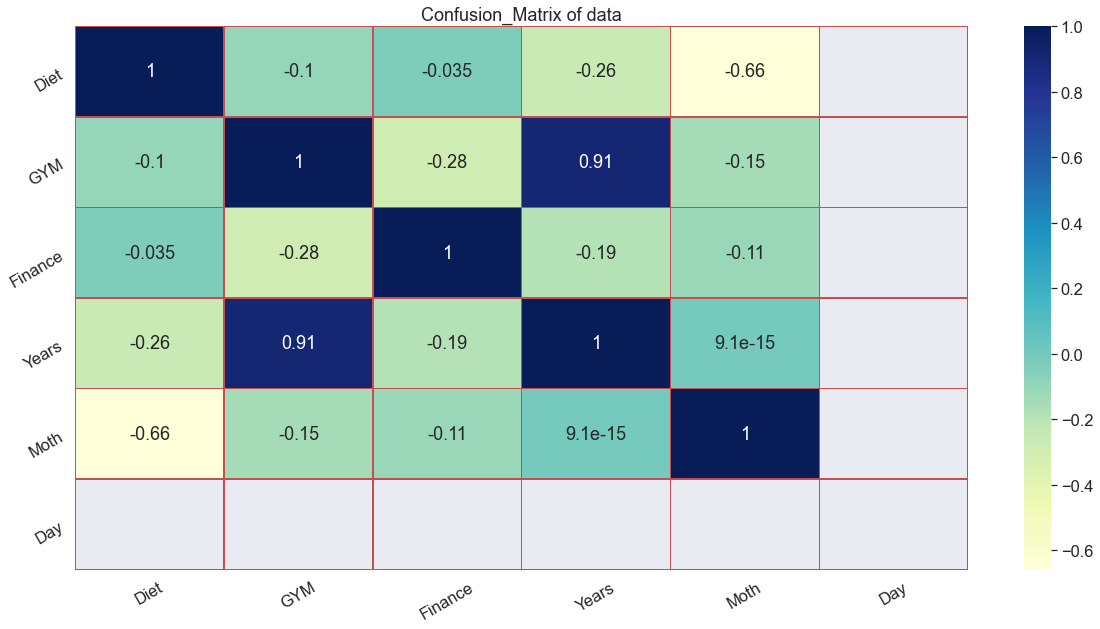

In [25]:
# Visualize The Feathure Correlations ::
Con_Matrix = df.corr()
sns.set( rc = {"figure.figsize" : [20 , 10]} , font_scale=1.5)
sns.heatmap(Con_Matrix , annot=True , cmap="YlGnBu" , linecolor="r" , linewidths=0.5)
plt.xticks(rotation = 30)
plt.yticks(rotation = 30)
plt.title("Confusion_Matrix of data")
# RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r

In [26]:
years = df["Years"].value_counts()[:5]
years

2004    12
2005    12
2006    12
2007    12
2008    12
Name: Years, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2004'),
  Text(1, 0, '2005'),
  Text(2, 0, '2006'),
  Text(3, 0, '2007'),
  Text(4, 0, '2008')])

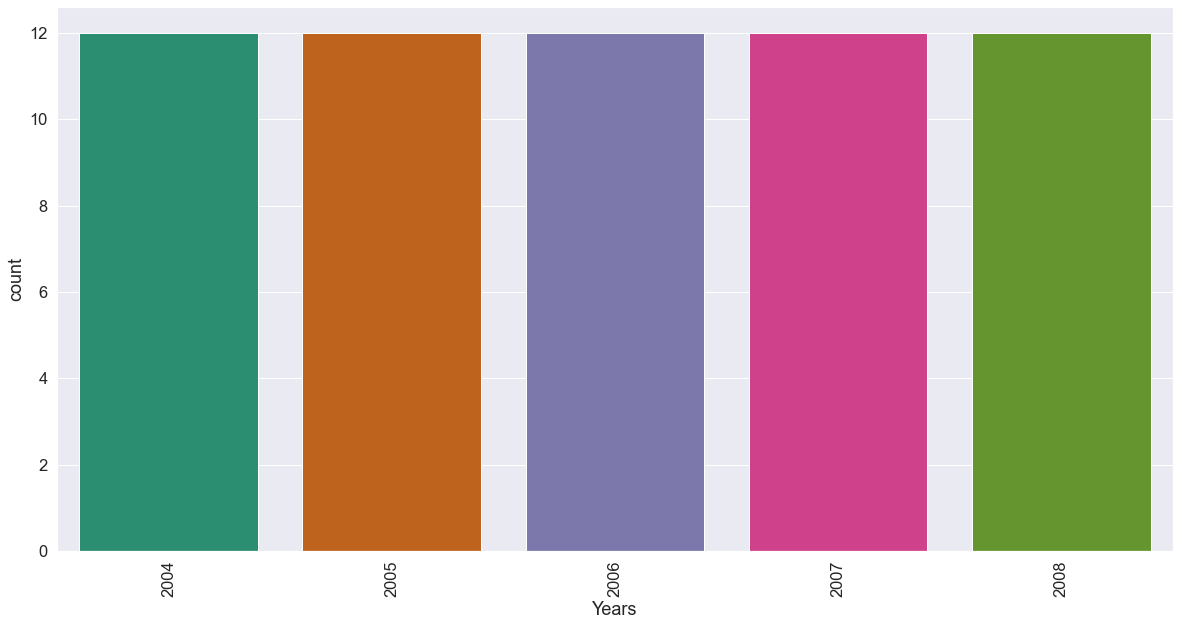

In [27]:
sns.countplot( "Years" , data = df[df["Years"].isin(years.index)] , palette="Dark2")
plt.xticks(rotation = 90)

In [28]:
df["Moth"].value_counts()

1     14
2     14
3     14
4     14
5     14
6     14
7     14
8     14
9     14
10    14
11    14
12    14
Name: Moth, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

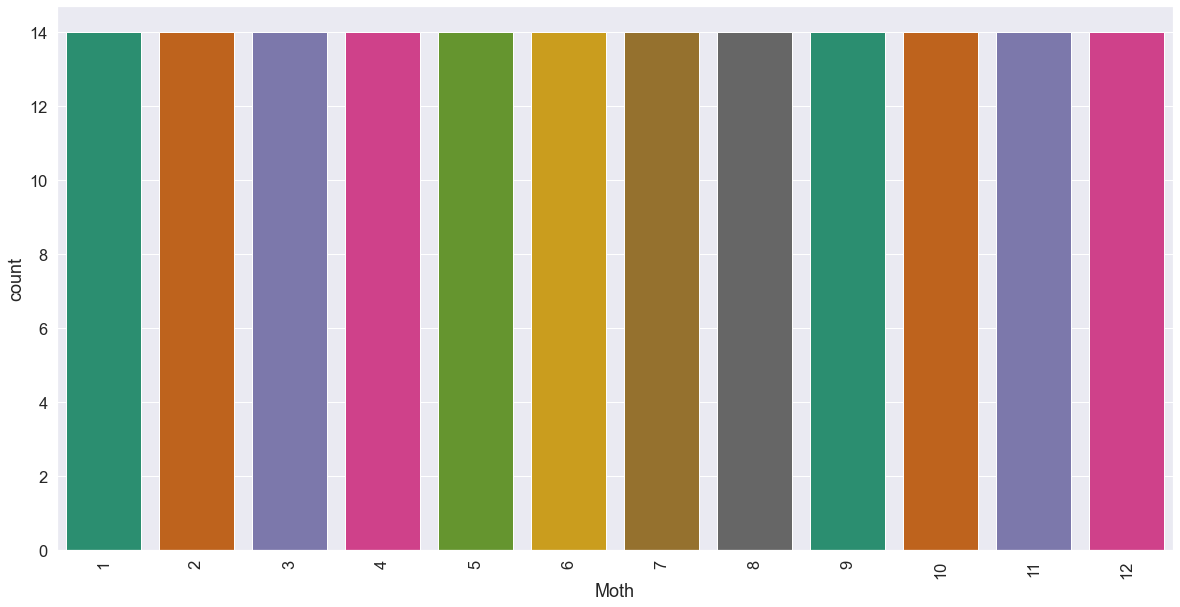

In [29]:
sns.countplot( "Moth" , data = df , palette="Dark2")
plt.xticks(rotation = 90)

* From the result above we can't extract any observation so that we must deal with that data use other technice which Time series technice by set tha dat as index and visualize data to exrtract meaningfull knowledge insights and visions from that data.

In [30]:
df

,Date,Diet,GYM,Finance,Years,Moth,Day
0,2004-01-01,100,31,48,2004,1,1
1,2004-02-01,75,26,49,2004,2,1
2,2004-03-01,67,24,47,2004,3,1
3,2004-04-01,70,22,48,2004,4,1
4,2004-05-01,72,22,43,2004,5,1
...,...,...,...,...,...,...,...
163,2017-08-01,46,52,43,2017,8,1
164,2017-09-01,44,50,47,2017,9,1
165,2017-10-01,44,47,45,2017,10,1
166,2017-11-01,41,47,47,2017,11,1


In [34]:
df.columns

Index(['Date', 'Diet', 'GYM', 'Finance', 'Years', 'Moth', 'Day'], dtype='object')

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

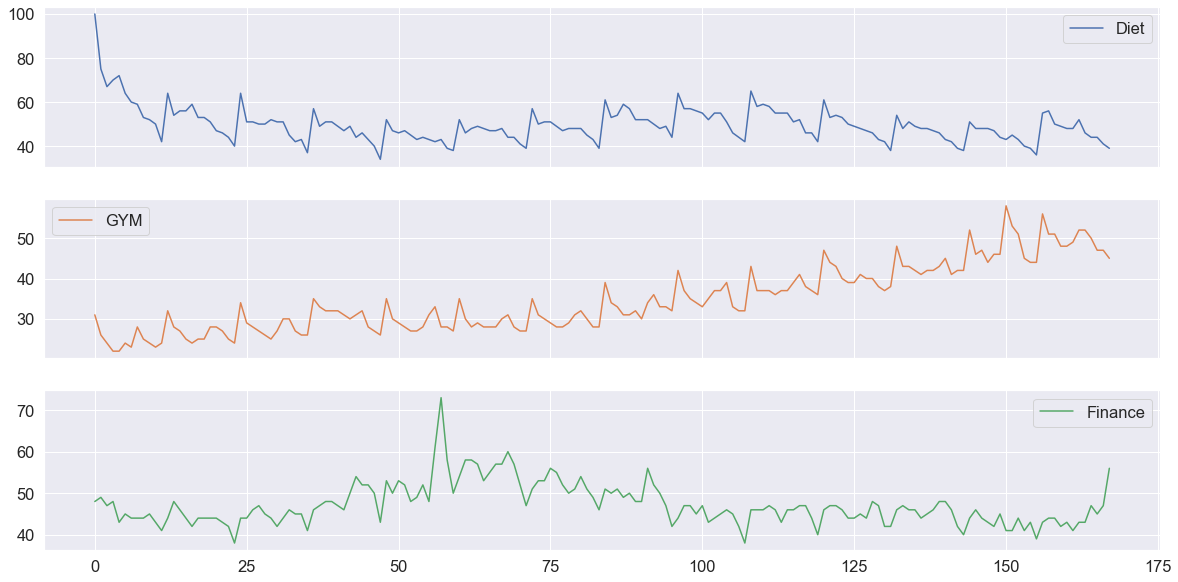

In [35]:
cols = ["Diet" , "GYM" , "Finance"]
df[cols].plot(subplots = True)

In [37]:
diet , gym , finance = df[["Diet"]] , df[["GYM"]] , df[["Finance"]]

Text(0.5, 1.0, 'diet with mean rolling')

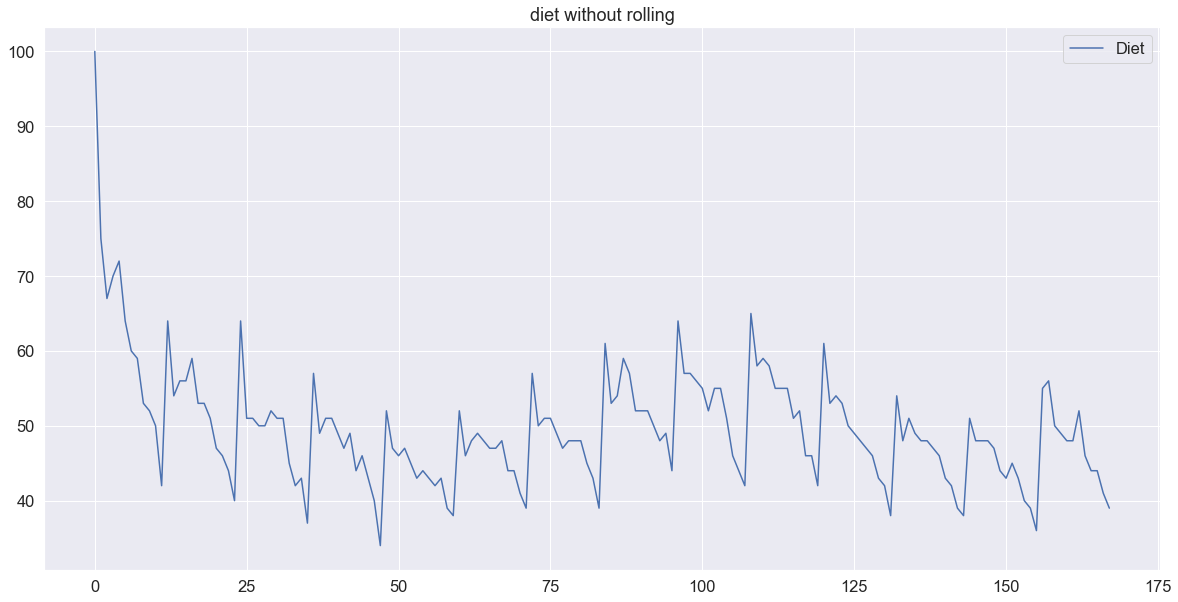

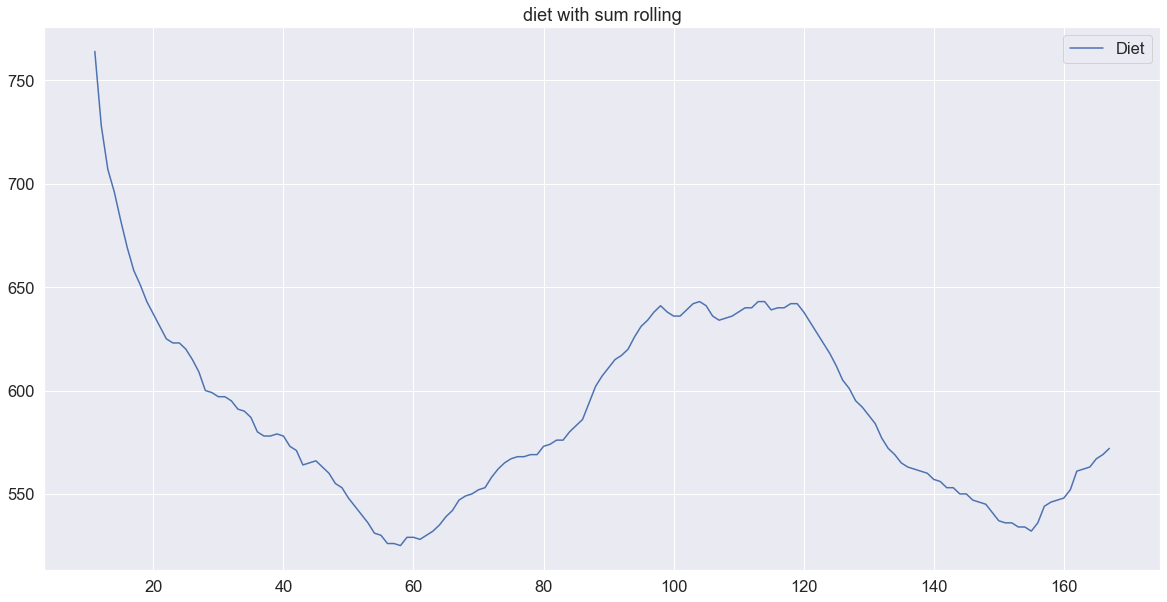

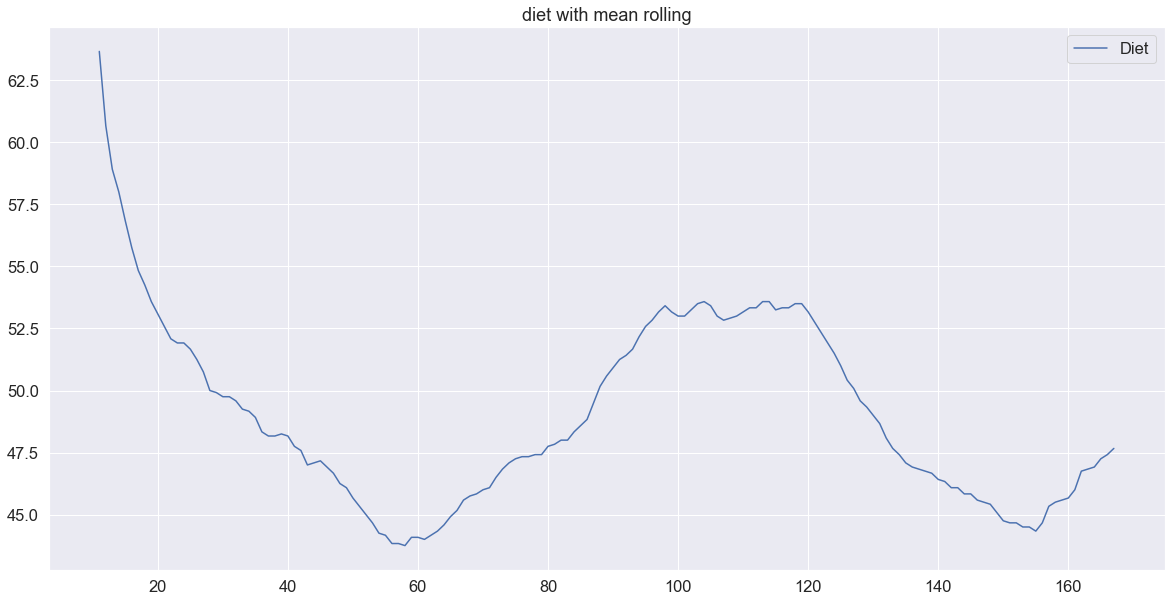

In [38]:
diet.plot()
plt.title("diet without rolling")
diet.rolling(12).sum().plot()
plt.title("diet with sum rolling")
diet.rolling(12).mean().plot()
plt.title("diet with mean rolling")


Text(0.5, 1.0, 'gym with mean rolling')

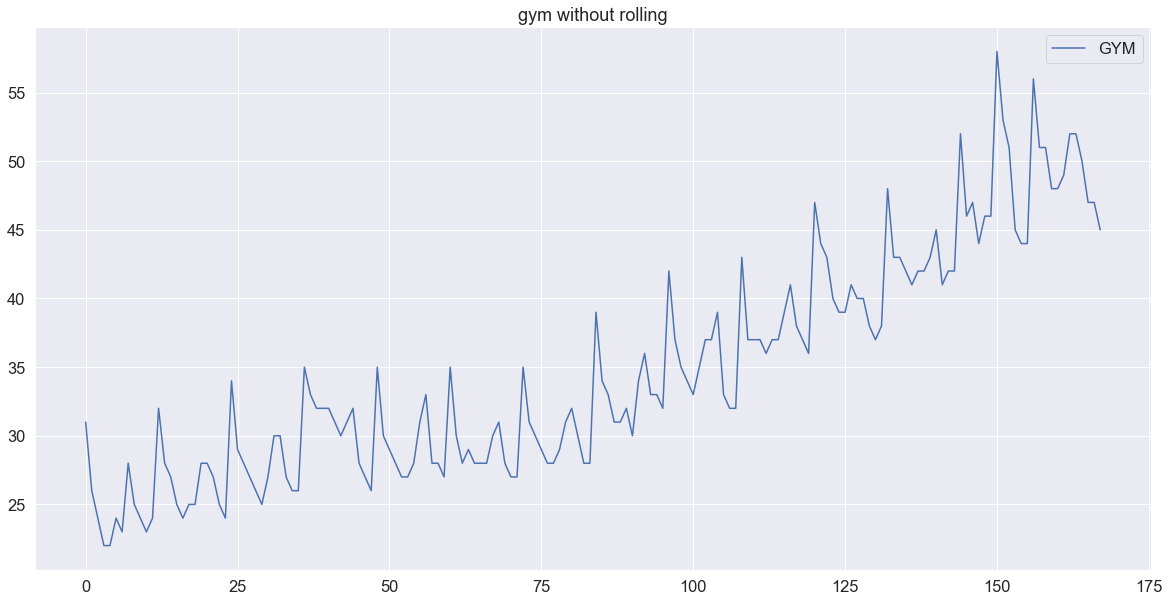

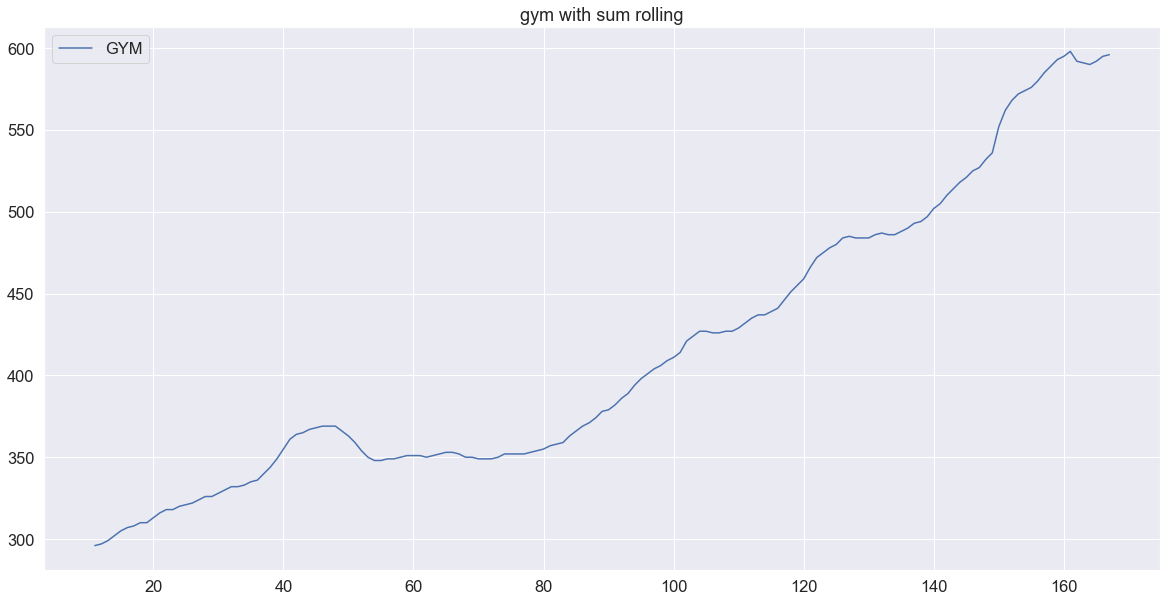

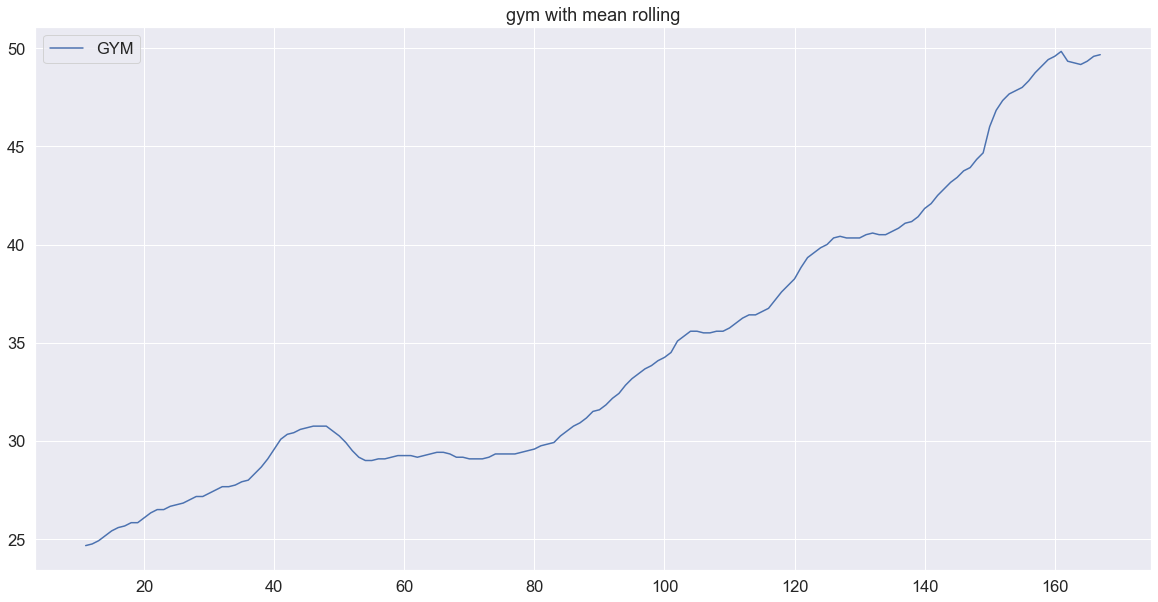

In [39]:
gym.plot()
plt.title("gym without rolling")
gym.rolling(12).sum().plot()
plt.title("gym with sum rolling")
gym.rolling(12).mean().plot()
plt.title("gym with mean rolling")


Text(0.5, 1.0, 'finance with mean rolling')

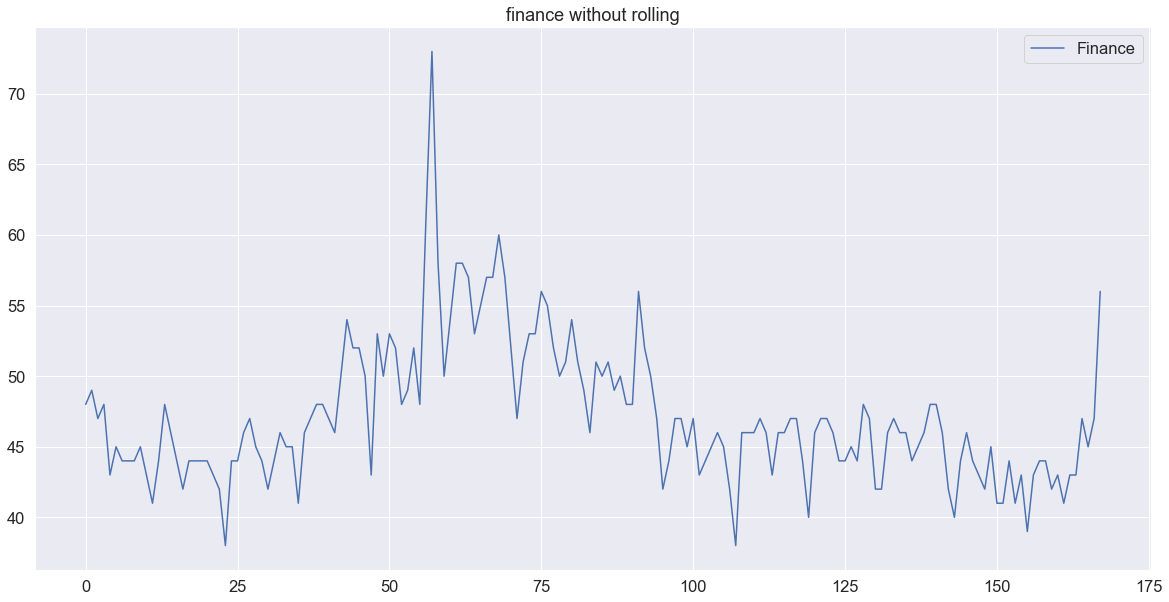

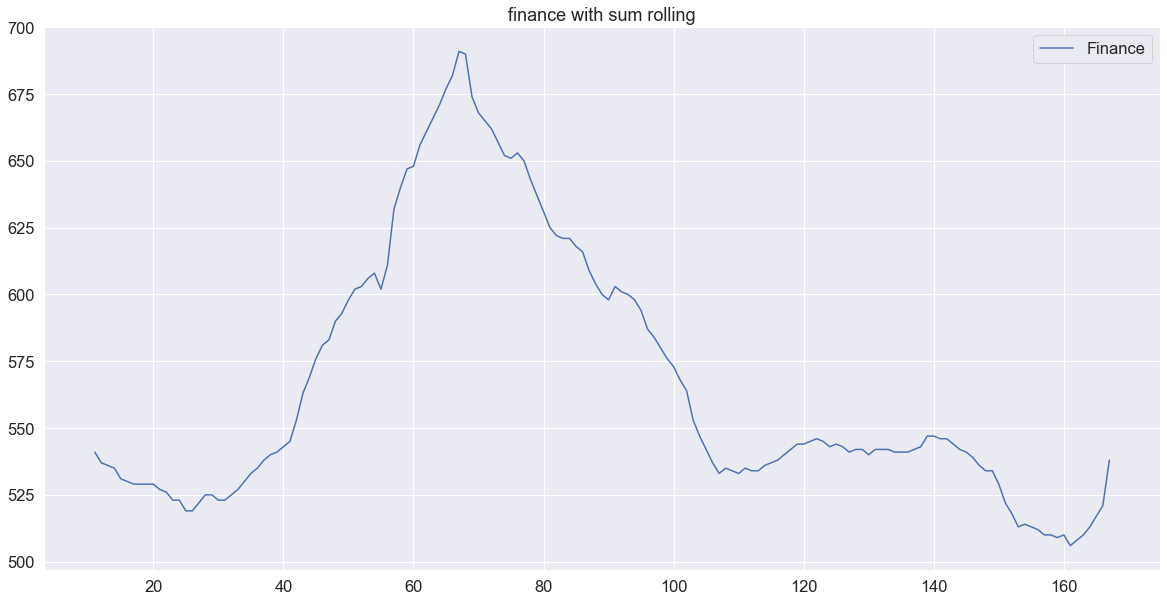

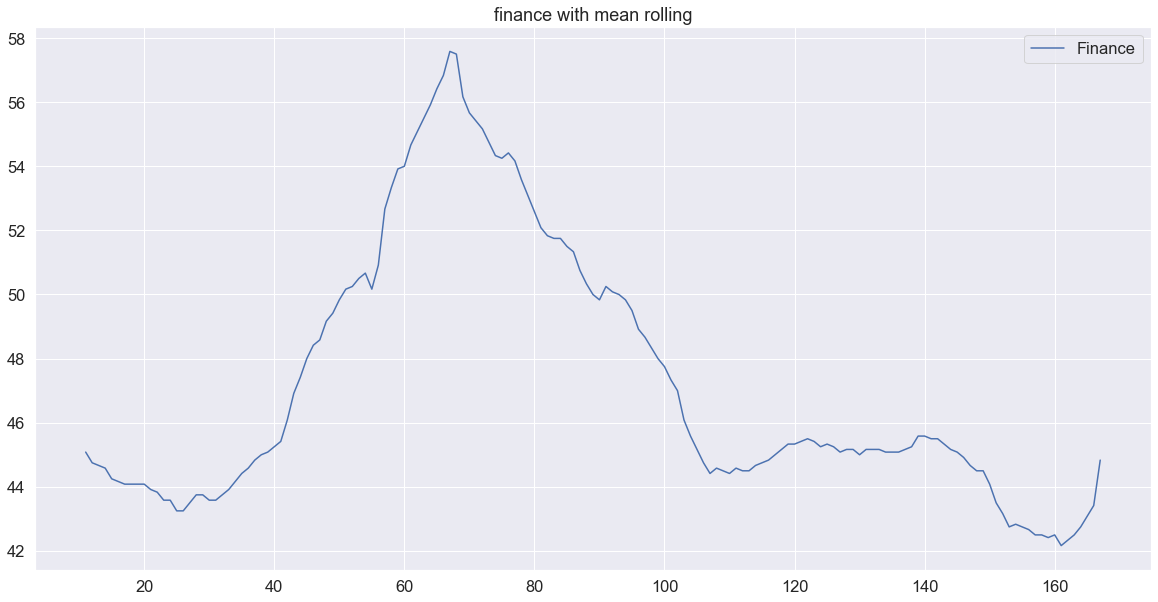

In [40]:
finance.plot()
plt.title("finance without rolling")
finance.rolling(12).sum().plot()
plt.title("finance with sum rolling")
finance.rolling(12).mean().plot()
plt.title("finance with mean rolling")


In [41]:
diet_gym_finance = pd.concat([diet.rolling(12).mean() , gym.rolling(12).mean() , finance.rolling(12).mean()] , axis= 1)

Text(0.5, 1.0, 'finance of diet')

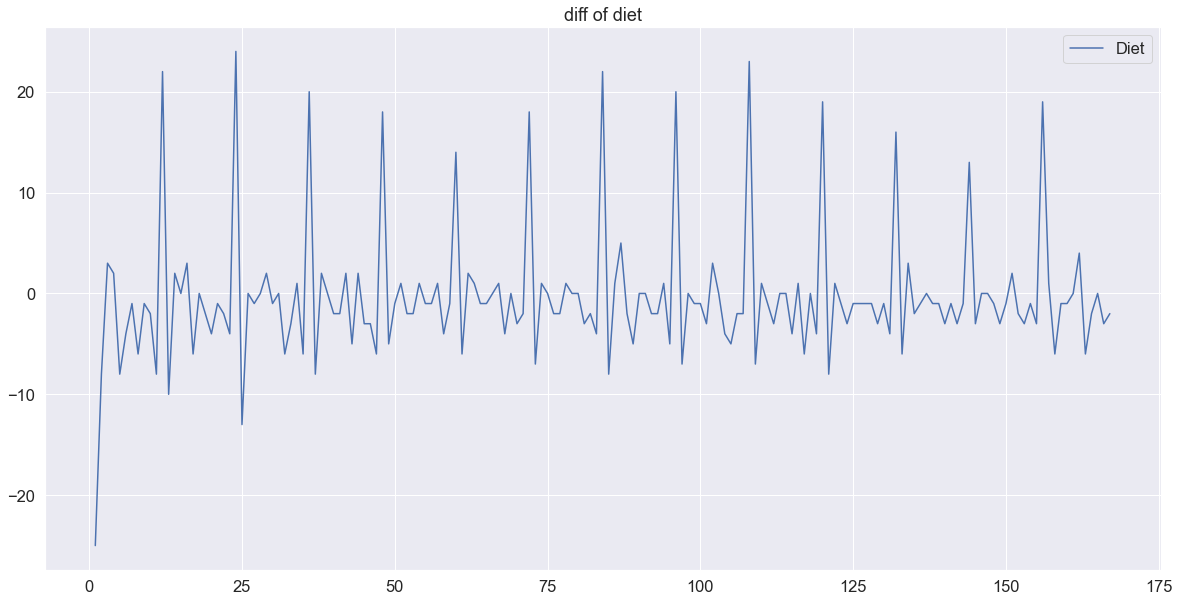

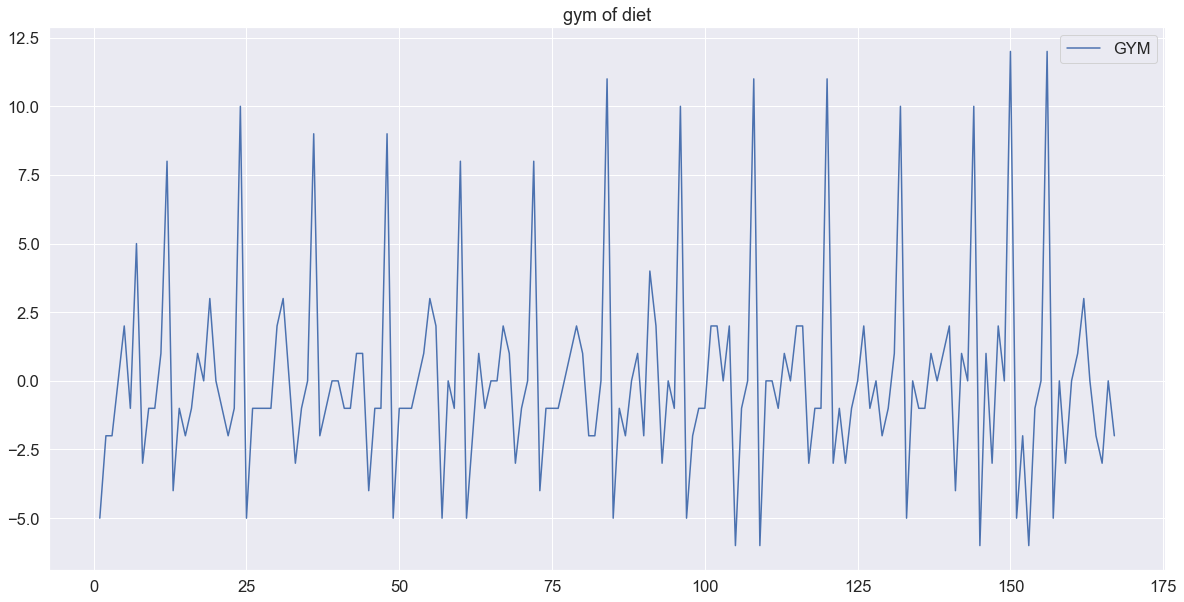

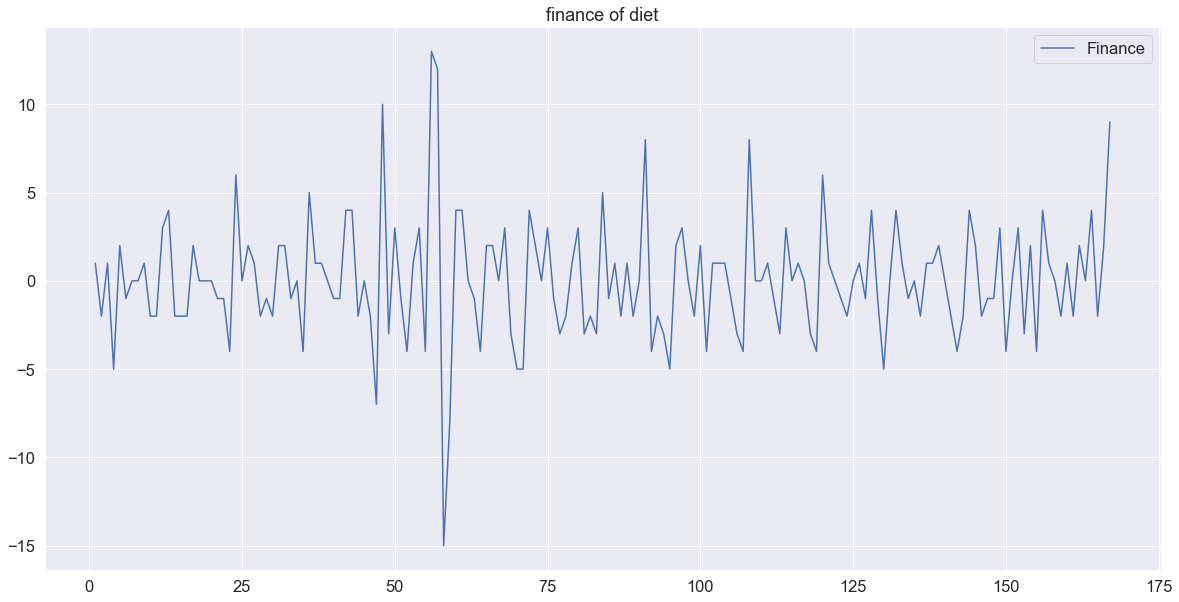

In [42]:
diet.diff().plot()
plt.title("diff of diet")
gym.diff().plot()
plt.title("gym of diet")
finance.diff().plot()
plt.title("finance of diet")


In [43]:
df.corr()

,Diet,GYM,Finance,Years,Moth,Day
Diet,1.000000,-0.100764,-0.034639,-2.555298e-01,-6.600849e-01,NaN
GYM,-0.100764,1.000000,-0.284279,9.065287e-01,-1.475530e-01,NaN
Finance,-0.034639,-0.284279,1.000000,-1.898723e-01,-1.128614e-01,NaN
Years,-0.255530,0.906529,-0.189872,1.000000e+00,9.108851e-15,NaN
Moth,-0.660085,-0.147553,-0.112861,9.108851e-15,1.000000e+00,NaN
Day,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df.diff().corr()

,Diet,GYM,Finance,Years,Moth,Day
Diet,1.000000,0.758707,0.373828,0.855045,-0.855045,NaN
GYM,0.758707,1.000000,0.301111,0.774813,-0.774813,NaN
Finance,0.373828,0.301111,1.000000,0.420883,-0.420883,NaN
Years,0.855045,0.774813,0.420883,1.000000,-1.000000,NaN
Moth,-0.855045,-0.774813,-0.420883,-1.000000,1.000000,NaN
Day,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

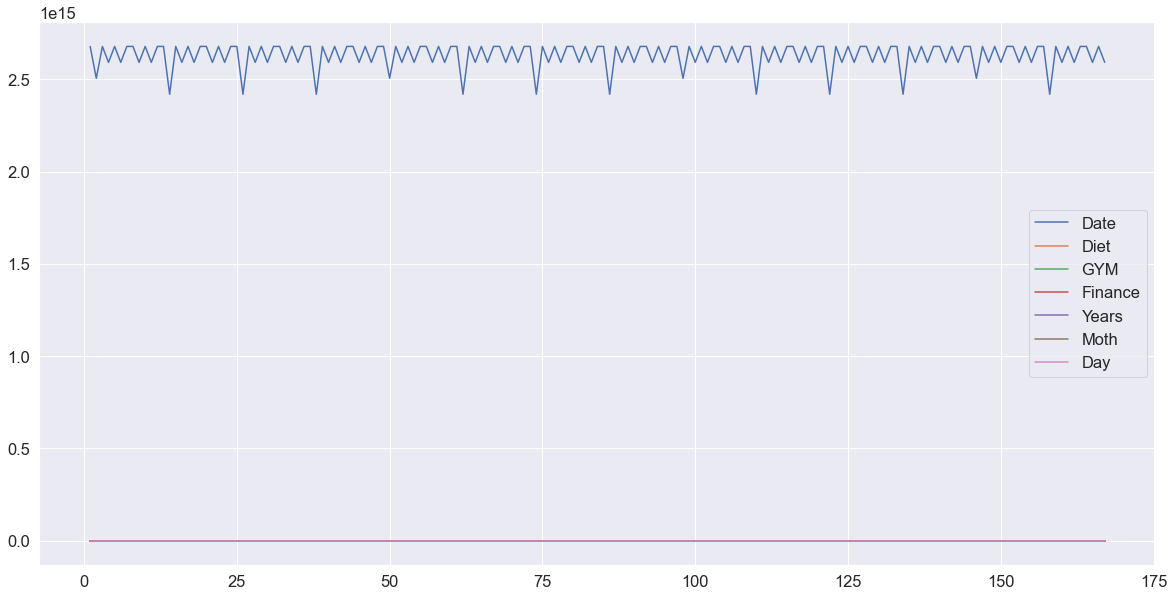

In [45]:
df.diff().plot()

Text(0.5, 1.0, 'Autocoreelation of all features')

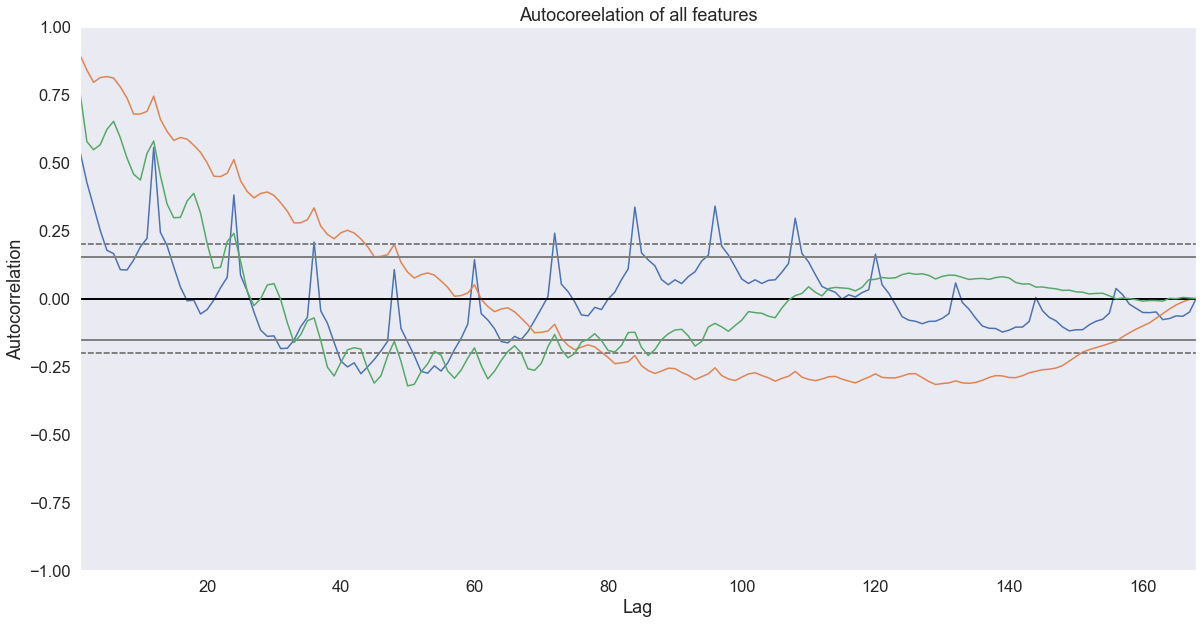

In [46]:
pd.plotting.autocorrelation_plot(diet)
pd.plotting.autocorrelation_plot(gym)
pd.plotting.autocorrelation_plot(finance)
plt.title("Autocoreelation of all features")

Text(0.5, 1.0, 'Autocoreelation of diet')

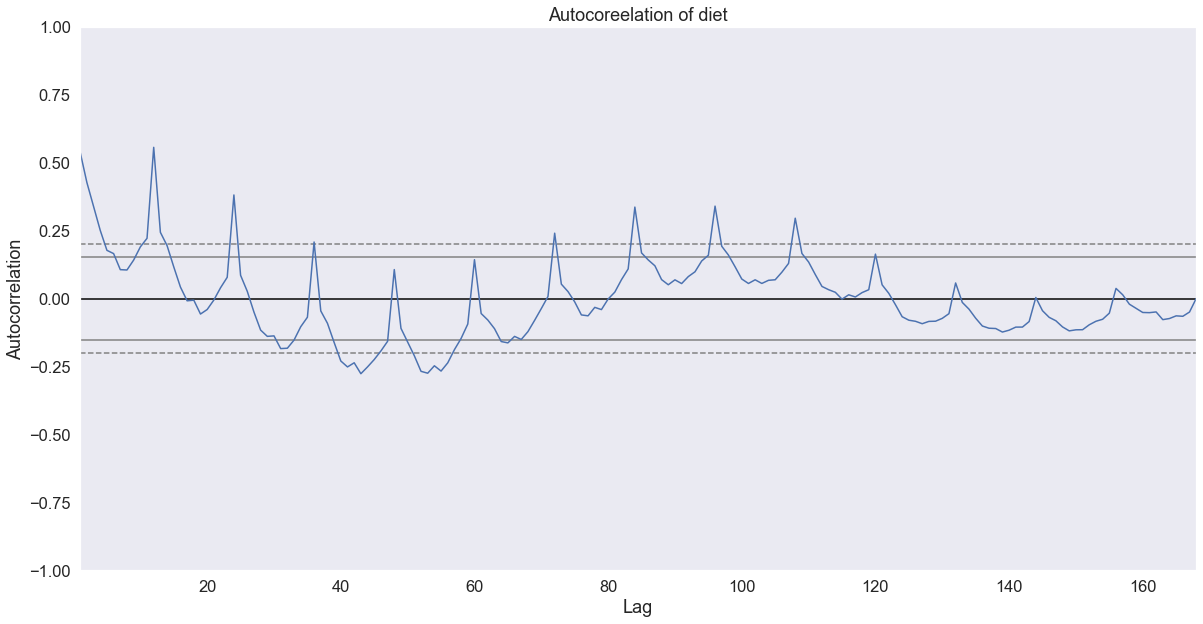

In [47]:
pd.plotting.autocorrelation_plot(diet)
plt.title("Autocoreelation of diet")

Text(0.5, 1.0, 'Autocoreelation of gym')

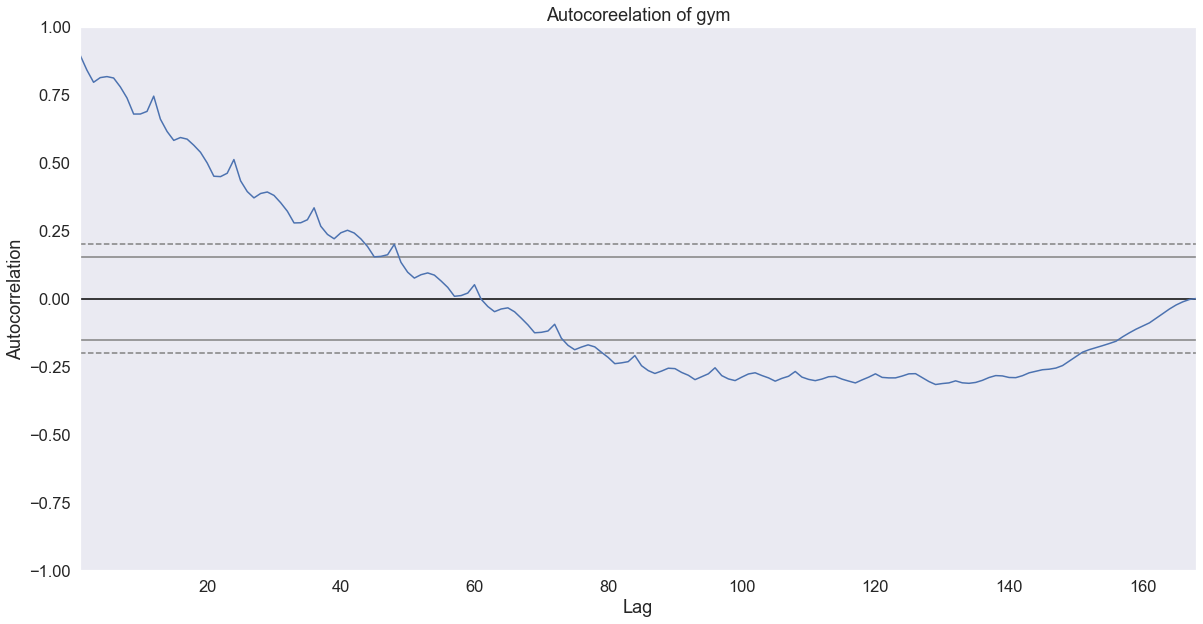

In [48]:
pd.plotting.autocorrelation_plot(gym)
plt.title("Autocoreelation of gym")

Text(0.5, 1.0, 'Autocoreelation of finance')

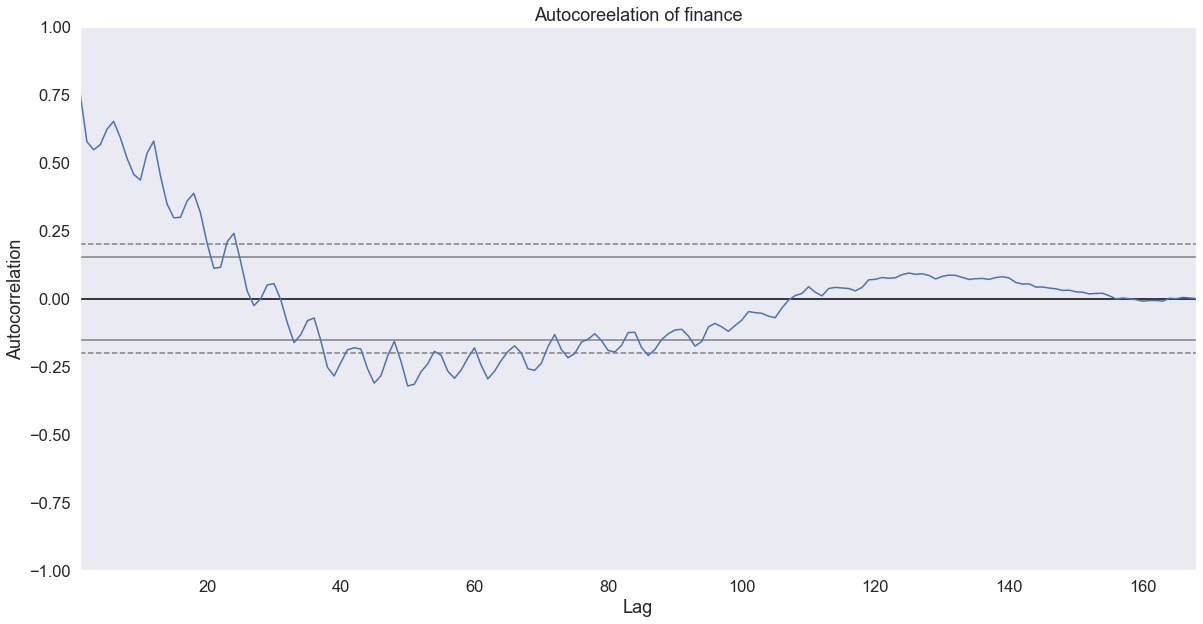

In [49]:
pd.plotting.autocorrelation_plot(finance)
plt.title("Autocoreelation of finance")